In [4]:
import pandas as pd

In [5]:
pd.options.display.max_columns = None # type: ignore

## Dataset Analysis and Cleaning

The goal is to apply customer segmentation to the dataset in order to give relevant credit card recommendations to customers.

In [6]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Removing Irrelevant Columns 

In [7]:
data["Attrition_Flag"].unique() # Do I have any use for attrited customers in this senario

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [8]:
data["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [9]:
print(str(data.index.size) + " total rows") # number of rows in dataframe

10127 total rows


In [10]:
str_to_find = "Attrited Customer"
filtered_data = data.query('Attrition_Flag == @str_to_find')

data = data.drop(filtered_data.index, axis="index")

print(data["Attrition_Flag"].unique())
print(str(data.index.size) + " total rows")

['Existing Customer']
8500 total rows


In [11]:
data = data.drop("Attrition_Flag", axis="columns")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


I removed data points about Attrited Customers. Becuase although Attrited Customer Data Analysis can be valuable for future research, it is outside the scope of this project. This project's main goal is Customer Segmentation for Credit Card Recommendations for Existing Customers.

In [12]:
data["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [13]:
data["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [14]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [15]:
data["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [16]:
data.iloc[:, -2:].head()

,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.000093,0.99991
1,0.000057,0.99994
2,0.000021,0.99998
3,0.000134,0.99987
4,0.000022,0.99998


In [17]:
data = data.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
                               axis="columns")

# I can't find a use for these columns. These are more focused on customer attrition then credit cards

data

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,712503408,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,710841183,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


In [18]:
data.dtypes

CLIENTNUM                     int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Encoding the Data

In [19]:
data["Gender"] = data.apply(lambda rows: 1 if rows["Gender"] == "M" else 0, axis="columns")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
# Using Ordinal Encoding since I care primarily about the order of education levels
def func1(rows):
    if rows["Education_Level"] == "Uneducated": 
        return 0
    elif rows["Education_Level"] == "High School": 
        return 1
    elif rows["Education_Level"] == "College": 
        return 2
    elif rows["Education_Level"] == "Graduate": 
        return 3
    elif rows["Education_Level"] == "Post-Graduate": 
        return 4
    elif rows["Education_Level"] == "Doctorate": 
        return 5
    else: return 6 # For the "Unknown" category 

data["Education_Level"] = data.apply(func1, axis="columns")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=["Marital_Status"], dtype=int)

# Rearranging columns
data = pd.concat([data.iloc[:, :5], data.iloc[:, -4:], data.iloc[:, 5:-4]], axis="columns")

data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
def func2(rows):
    if rows["Income_Category"] == "Less than $40K":
        return 0
    elif rows["Income_Category"] == "$40K - $60K":
        return 1
    elif rows["Income_Category"] == "$60K - $80K":
        return 2
    elif rows["Income_Category"] == "$80K - $120K":
        return 3
    elif rows["Income_Category"] == "$120K +":
        return 4
    else: return 5 # For the "Unknown" category 

data["Income_Category"] = data.apply(func2, axis="columns")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# I'm ordering it based on trends, the Kaggle site (source of dataset) didn't mention any specific order
def func3(rows):
    if rows["Card_Category"] == "Blue":
        return 0
    elif rows["Card_Category"] == "Silver":
        return 1
    elif rows["Card_Category"] == "Gold":
        return 2
    elif rows["Card_Category"] == "Platinum":
        return 3 

data["Card_Category"] = data.apply(func3, axis="columns")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
data.dtypes

CLIENTNUM                     int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status_Divorced       int32
Marital_Status_Married        int32
Marital_Status_Single         int32
Marital_Status_Unknown        int32
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [25]:
data.to_csv("Cleaned_Dataset.csv")

### Analysing with Charts

In [26]:
import matplotlib.pyplot as plt

In [27]:
print("Youngest: "+str(data["Customer_Age"].min()))
print("Oldest: "+str(data["Customer_Age"].max()))

Youngest: 26
Oldest: 73


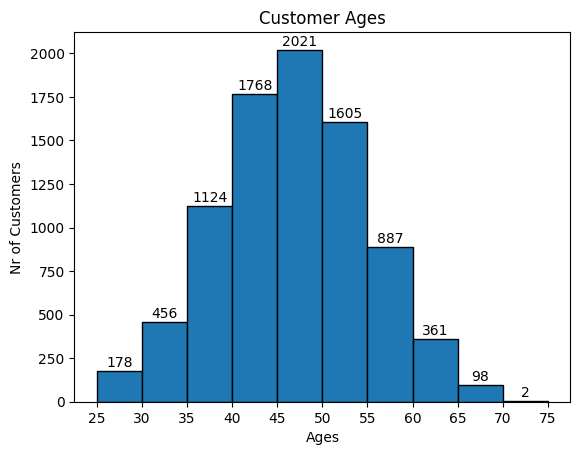

In [28]:
bin_size = 5
bins = [x for x in range(25, 76, bin_size)]

fig, ax = plt.subplots()

histPlot_data = ax.hist(data["Customer_Age"], bins, edgecolor = "black")
ax.set_title("Customer Ages")
ax.set_xlabel("Ages")
ax.set_ylabel("Nr of Customers")
ax.set_xticks(bins)

bar_heights = [int(x) for x in histPlot_data[0]]

for i in range(len(bar_heights)):
    ax.annotate(text=str(bar_heights[i]), 
                xy=(bins[i] + bin_size/2, bar_heights[i]),
                ha = "center", xytext=(0, 3), textcoords="offset points") 

plt.show()

In [38]:
def calcProportions(width: float, aspect_ratio = 16/9):
    return (width , width / aspect_ratio)

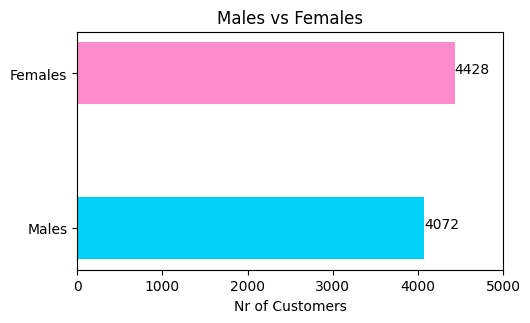

In [58]:
fig, ax = plt.subplots()

num_males = len(data.query('Gender == 1'))
num_females = len(data.query('Gender == 0'))

barPlot_data = ax.barh(y=["Males", "Females"], 
        width=[num_males, num_females], height=0.4, 
        color=[(0, 0.812, 0.969), (1, 0.541, 0.8)])
ax.set_xlabel("Nr of Customers")
ax.set_title("Males vs Females")
ax.set_xticks([x for x in range(0, 5001, 1000)])

ax.annotate(text=str(num_males), xy=(num_males, barPlot_data[0].get_y()+barPlot_data[0].get_height()/2))
ax.annotate(text=str(num_females), xy=(num_females, barPlot_data[1].get_y()+barPlot_data[1].get_height()/2))

fig.set_size_inches(calcProportions(5.5))

plt.show()